In [1]:
import evopipe
import warnings

from sklearn.model_selection import train_test_split
from sklearn import datasets

from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer, Binarizer
from sklearn.decomposition import PCA, KernelPCA, NMF
from sklearn.feature_selection import SelectKBest, chi2

from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

import matplotlib.pyplot as plt
import seaborn as sns

preproc_l = [MinMaxScaler(), StandardScaler(), Normalizer(), Binarizer(), PCA(), KernelPCA(), NMF(), SelectKBest(chi2)]
classif_l = [SVC(), LinearSVC(), KNeighborsClassifier(), DecisionTreeClassifier(), RandomForestClassifier(),
             AdaBoostClassifier(), QuadraticDiscriminantAnalysis()]

In [2]:
iris = datasets.load_iris()
train_X, test_X, train_Y, test_Y = train_test_split(iris.data, iris.target, test_size = 0.25, random_state = 0)

In [3]:
print("Format:")
print("------------")
print("Classifier")
print("score")
print("cross-validation score")
print("------------")
print()

with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    for classif in classif_l:
        print(classif.__class__.__name__)
        classif.fit(train_X, train_Y)
        print(classif.score(test_X, test_Y))
        print(cross_val_score(classif, test_X, test_Y).mean())
        print()

Format:
------------
Classifier
score
cross-validation score
------------

SVC
0.9736842105263158
0.9166666666666666

LinearSVC
0.9210526315789473
0.8650793650793651

KNeighborsClassifier
0.9736842105263158
0.888888888888889

DecisionTreeClassifier
0.9736842105263158
0.9444444444444443

RandomForestClassifier
0.9736842105263158
0.9722222222222222

AdaBoostClassifier
0.8947368421052632
0.9444444444444443

QuadraticDiscriminantAnalysis
0.9736842105263158
0.9166666666666666



In [4]:
clf = evopipe.EvoPipeClassifier(preproc_l, classif_l, 2, pop_size=50, ngen=40)
clf.fit(train_X, train_Y)

score = clf.score(test_X, test_Y)
print("\nBest pipeline test score: {}\n".format(score))

best_pipes = clf.best_pipelines()

for pipe in best_pipes:
    pipe.fit(train_X, train_Y)
    score = pipe.score(test_X, test_Y)
    
    pipe_named_steps = []
    for key, val in pipe.steps:
        pipe_named_steps.append(key)       
    print("Score: {}, Pipe: {}".format(score, pipe_named_steps))


Gen 1:

Hall of fame:
['minmaxscaler-1', 'minmaxscaler-2', 'adaboostclassifier']
['pca-1', 'pca-2', 'quadraticdiscriminantanalysis']
['pca', 'minmaxscaler', 'quadraticdiscriminantanalysis']
['normalizer-1', 'normalizer-2', 'adaboostclassifier']
['standardscaler', 'minmaxscaler', 'quadraticdiscriminantanalysis']

Gen 6:

Hall of fame:
['normalizer-1', 'normalizer-2', 'quadraticdiscriminantanalysis']
['normalizer', 'pca', 'quadraticdiscriminantanalysis']
['normalizer', 'minmaxscaler', 'quadraticdiscriminantanalysis']
['minmaxscaler-1', 'minmaxscaler-2', 'adaboostclassifier']
['pca-1', 'pca-2', 'quadraticdiscriminantanalysis']

Gen 11:

Hall of fame:
['normalizer-1', 'normalizer-2', 'quadraticdiscriminantanalysis']
['normalizer', 'pca', 'quadraticdiscriminantanalysis']
['normalizer', 'minmaxscaler', 'quadraticdiscriminantanalysis']
['minmaxscaler-1', 'minmaxscaler-2', 'adaboostclassifier']
['pca-1', 'pca-2', 'quadraticdiscriminantanalysis']

Gen 16:

Hall of fame:
['normalizer', 'quadrat

gen	avg     	min     	max     
0  	0.832842	0       	0.972934
1  	0.922994	0.696485	0.981481
2  	0.919679	0.337703	0.981481
3  	0.914402	0.260568	0.981481
4  	0.958949	0.366155	0.981481
5  	0.967636	0.366155	0.981481
6  	0.961852	0       	0.981481
7  	0.981481	0.981481	0.981481
8  	0.966711	0.366155	0.981481
9  	0.98095 	0.972472	0.981481
10 	0.960628	0       	0.981481
11 	0.955435	0.33033 	0.981481
12 	0.981481	0.981481	0.981481
13 	0.962726	0.337703	0.981481
14 	0.969175	0.366155	0.981481
15 	0.956299	0.337703	0.981481
16 	0.969004	0.366155	0.981481
17 	0.928686	0       	0.981481
18 	0.942222	0       	0.981481
19 	0.981311	0.972934	0.981481
20 	0.980959	0.955378	0.981481
21 	0.98113 	0.963925	0.981481
22 	0.967747	0.337703	0.981481
23 	0.967904	0.337703	0.981481
24 	0.924235	0.33033 	0.981481
25 	0.980969	0.972934	0.981481
26 	0.980788	0.963925	0.981481
27 	0.967595	0.33033 	0.981481
28 	0.968107	0.33033 	0.981481
29 	0.975625	0.714753	0.981481
30 	0.968833	0.366155	0.981481
31 	0.98

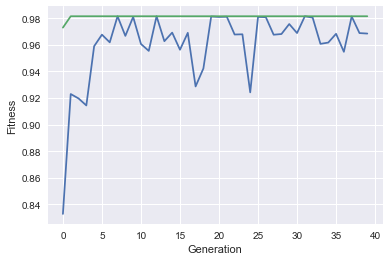

In [5]:
print(clf.logbook)

gen = clf.logbook.select("gen")
avgs, mins, maxs, vars = clf.logbook.select("avg", "min", "max", "var")

sns.set()

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(gen, avgs, label='Average')
ax1.set_xlabel("Generation")
ax1.set_ylabel("Fitness")

ax1.plot(gen, maxs, label='Maximum')
ax1.set_xlabel("Generation")
# ax1.set_ylabel("Maximum Fitness")

plt.show()